In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('deep')


In [70]:
car=pd.read_csv('Car_cleaned.csv')
car.head()
df=car.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [71]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'],
      dtype='object')

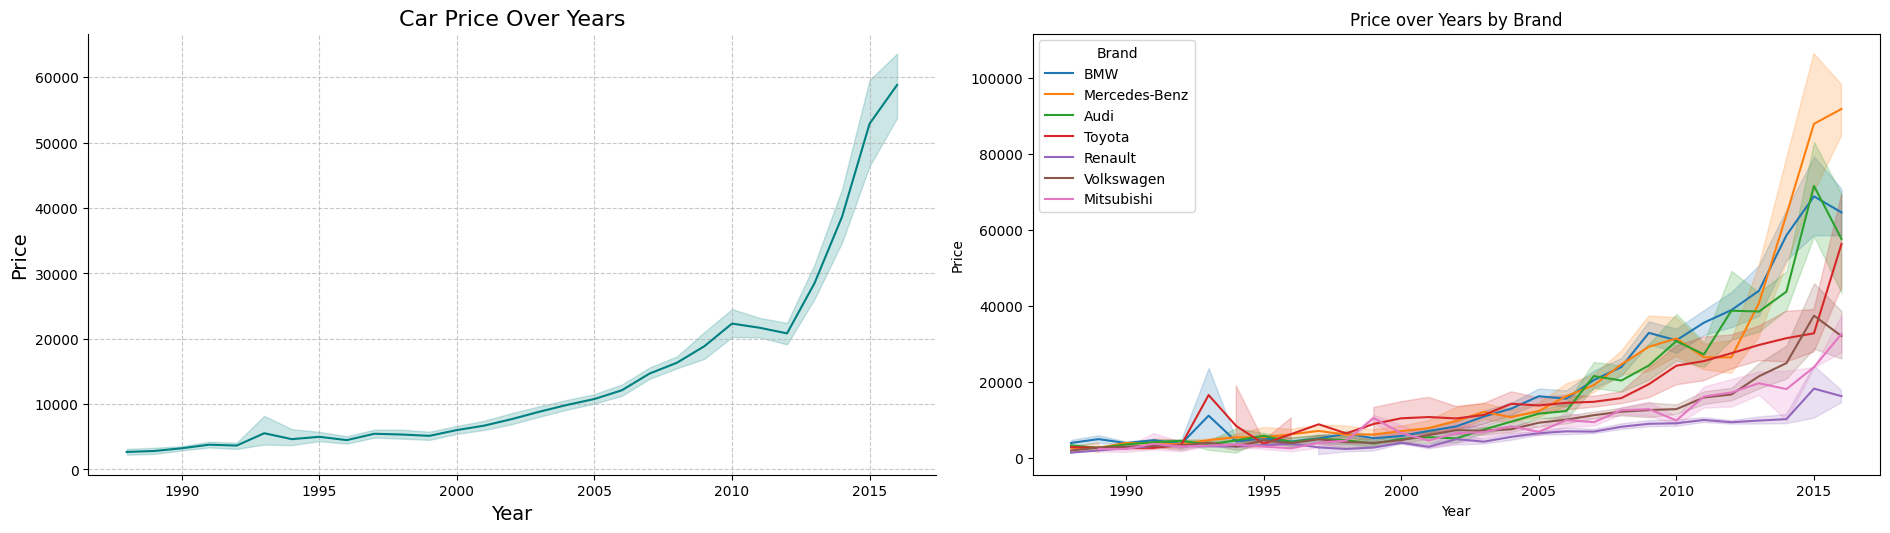

In [72]:
plt.figure(figsize=(19, 10))
plt.subplot(2,2,1)
sns.lineplot(x='Year', y='Price', data=df, color='teal')
plt.title('Car Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)


plt.subplot(2,2,2)
sns.lineplot(data=car, x='Year', y='Price', hue='Brand', palette='tab10')
plt.title('Price over Years by Brand')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()



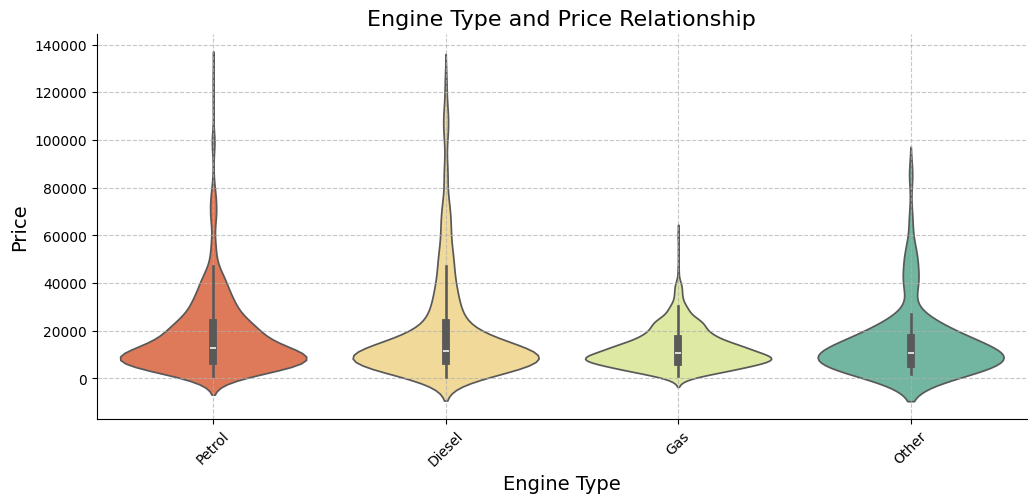

In [73]:

plt.figure(figsize=(12, 5))
sns.violinplot(x='Engine Type', y='Price', hue='Engine Type', data=car, palette='Spectral', legend=False)
plt.title('Engine Type and Price Relationship', fontsize=16)
plt.xlabel('Engine Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

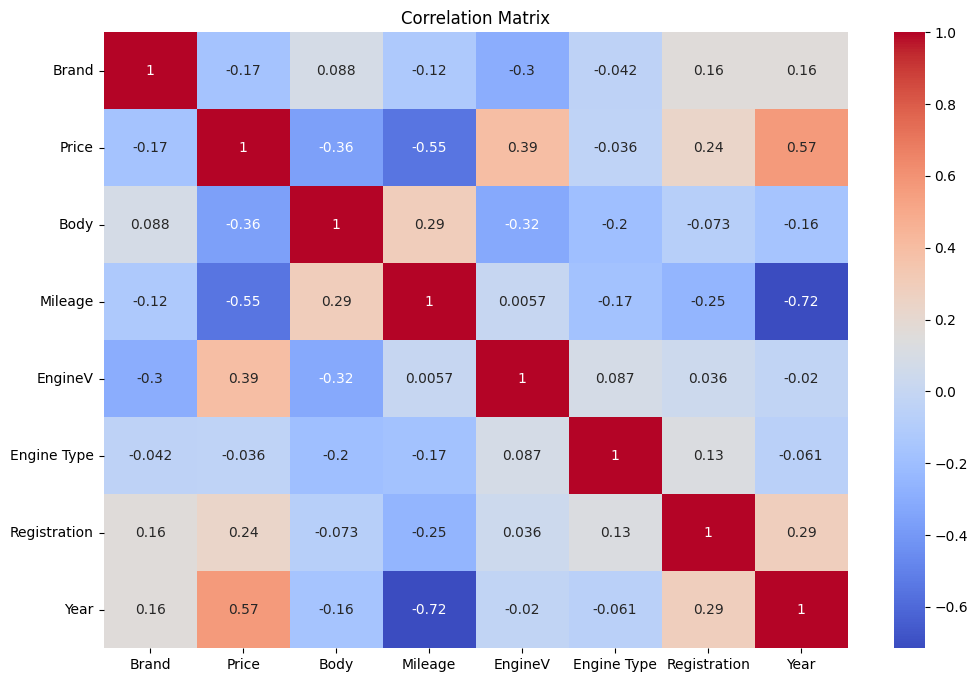

In [74]:
plt.figure(figsize=(12, 8))

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    if car[i].dtypes == 'object':
        car[i] = le.fit_transform(car[i])

sns.heatmap(car.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

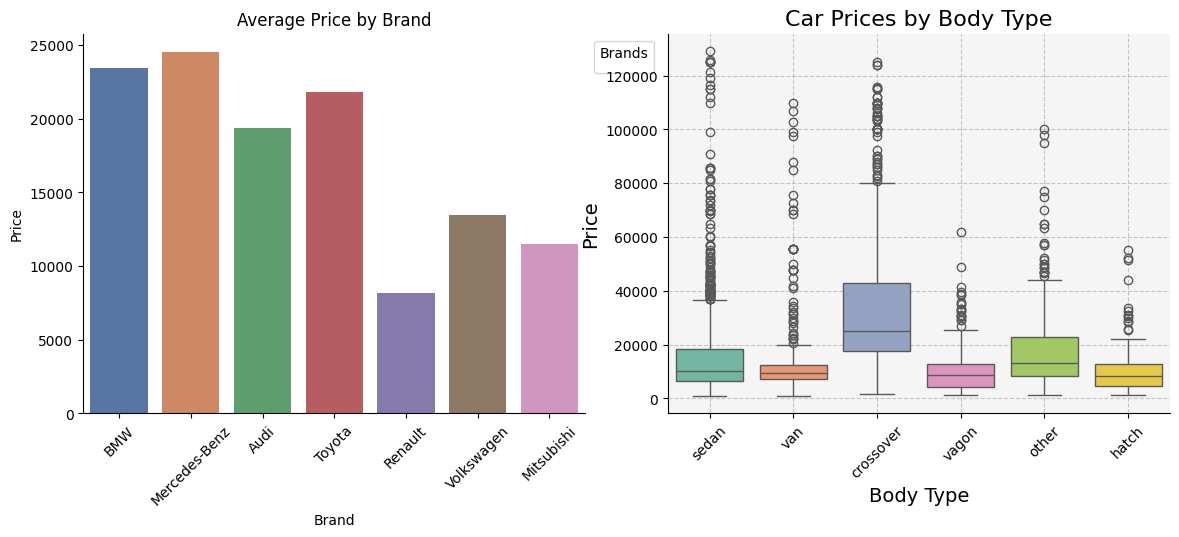

In [78]:
plt.figure(figsize=(18, 15))

# First subplot: Bar Plot
plt.subplot(3, 3, 1)
bar_plot = sns.barplot(data=df, x='Brand', y='Price', errorbar=None, hue='Brand')
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Brands', loc='upper right', bbox_to_anchor=(1.15, 1))  # Add legend
plt.tight_layout(pad=2.0)  # Adjust padding

# Second subplot: Box Plot
plt.subplot(3, 3, 2)
box_plot = sns.boxplot(x='Body', y='Price', hue='Body', data=df, palette='Set2', legend=False)
plt.title('Car Prices by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color
plt.gca().set_facecolor('whitesmoke')


plt.show()

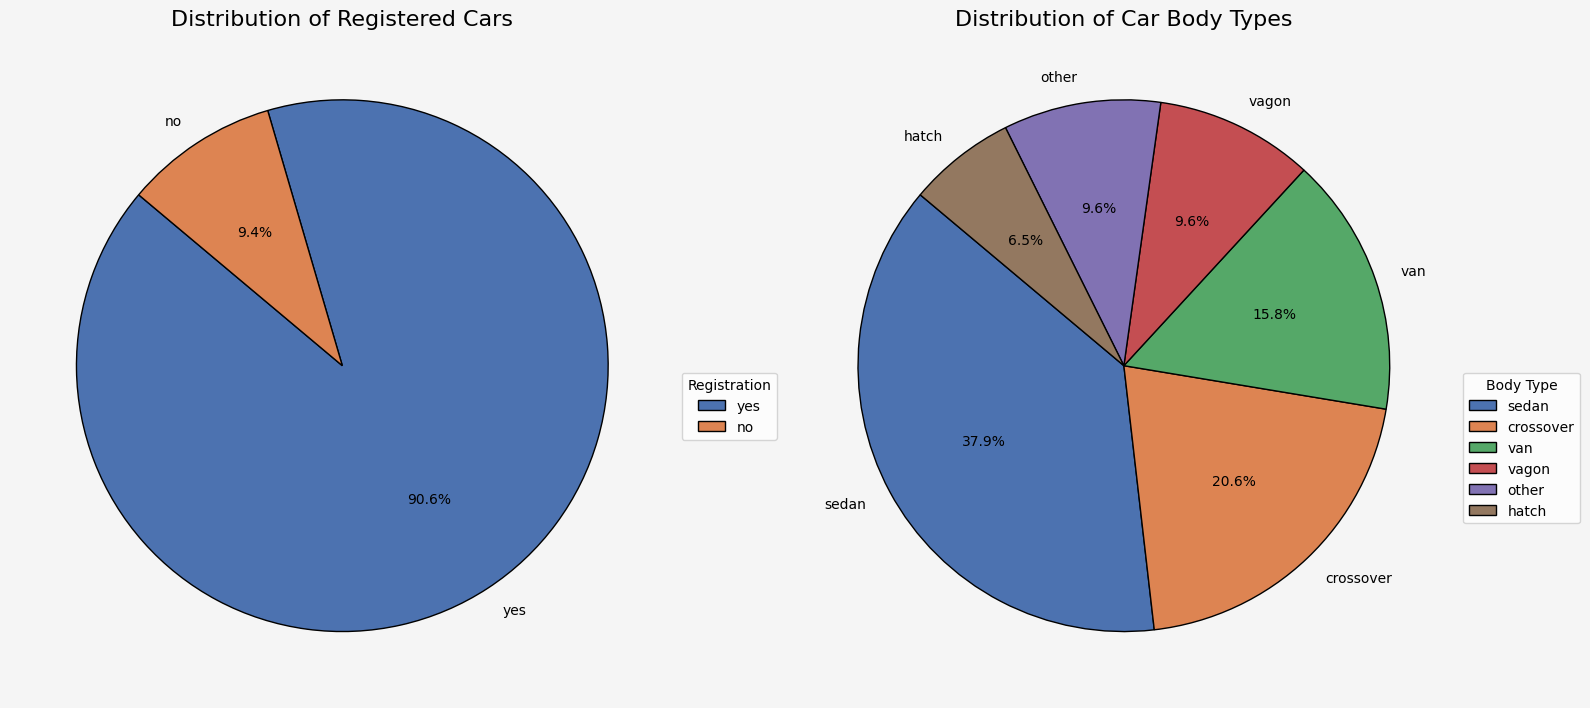

In [106]:


# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# Colors for the pie charts
colors_registered = sns.color_palette('Set2')
colors_body = sns.color_palette('Set3')

# Distribution of Registered Cars
registered_counts = df['Registration'].value_counts()
axes[0].pie(registered_counts, labels=registered_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Distribution of Registered Cars', fontsize=16)
axes[0].legend(registered_counts.index, title='Registration', loc='best', bbox_to_anchor=(1, 0.5))

# Distribution of Car Body Types
body_counts = df['Body'].value_counts()
axes[1].pie(body_counts, labels=body_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Distribution of Car Body Types', fontsize=16)
axes[1].legend(body_counts.index, title='Body Type', loc='best', bbox_to_anchor=(1, 0.5))

# Adding a background color
fig.patch.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()


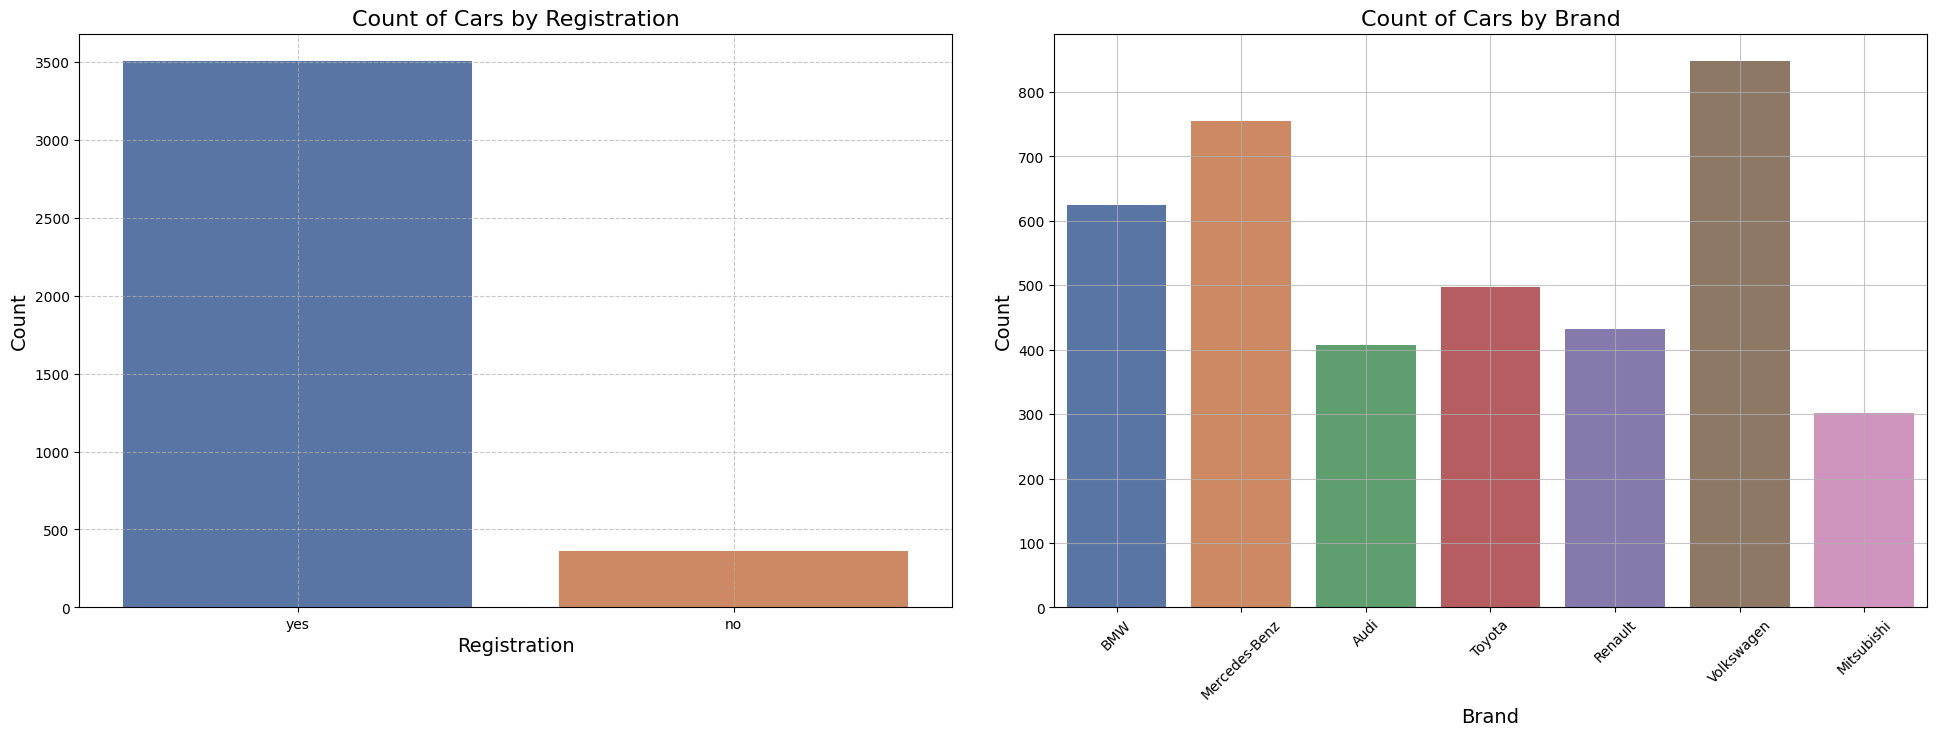

In [105]:
plt.figure(figsize=(20, 8))

# First subplot: Count Plot for Registration
plt.subplot(1, 2, 1)
sns.countplot(x='Registration', hue='Registration', data=df, legend=False)
plt.title('Count of Cars by Registration', fontsize=16)
plt.xlabel('Registration', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Second subplot: Count Plot for Brand
plt.subplot(1, 2, 2)
sns.countplot(x='Brand', hue='Brand', data=df, legend=False)
plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.7)

plt.tight_layout(pad=3.0)
plt.show()

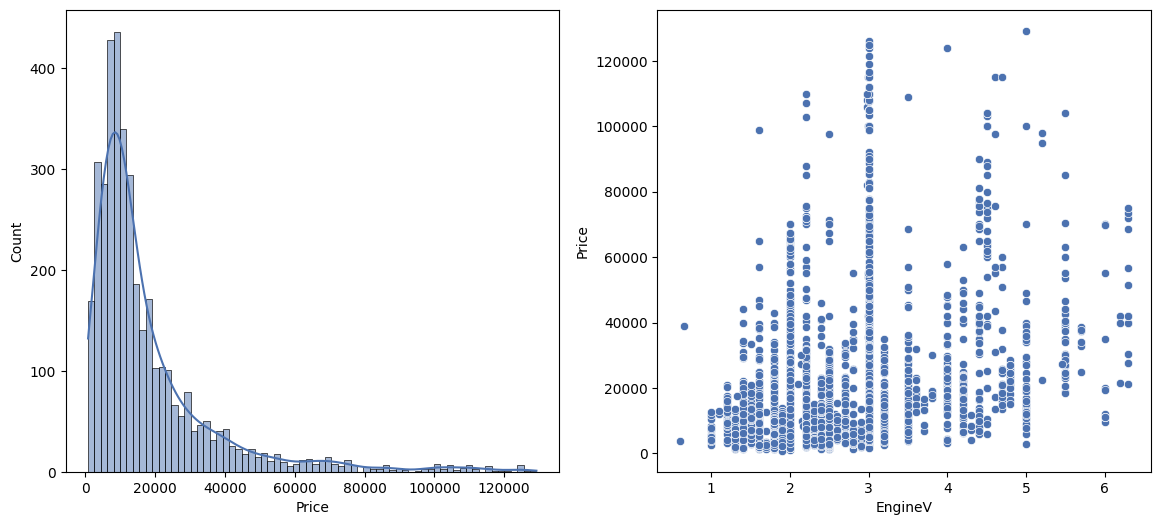

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Price'], kde=True, ax=axes[0])
sns.scatterplot(x='EngineV', y='Price', data=df, ax=axes[1])
plt.show()